**Agglomerative clustering :** now we want to implement Agglomerative clustering .


(60000, 28, 28)
(60000,)


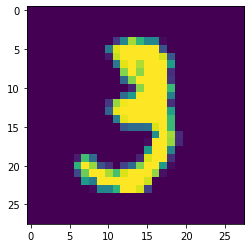

(60000, 784)
(784,)


'0.22.2.post1'

In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from tqdm import tqdm
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
plt.imshow(x_train[10])
plt.show()
y_train[10]
# convert each image to 1 dimensional array

X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)
sklearn.__version__

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ac10 = AgglomerativeClustering(n_clusters = 10)


AgglomerativeClustering= ac10.fit(X[:5000,])


In [ ]:
AgglomerativeClustering.n_clusters_

10

In [ ]:
AgglomerativeClustering.labels_

array([4, 0, 5, ..., 6, 3, 6])

In [ ]:
AgglomerativeClustering.labels_[10]

4

Like previous algorithms, we need to infer labels from clusters based on the counts of  actual labels.

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
  inferred_labels = {}

  for i in range(kmeans.n_clusters):

    # find index of points in cluster
    labels = []
    index = np.where(kmeans.labels_ == i)
    #print("index is : " + str(index))
    # append actual labels for each point in cluster
    labels.append(actual_labels[index])
    #print("actual label  is : " + str(actual_labels[index]))
    # determine most common label
    if len(labels[0]) == 1:
        counts = np.bincount(labels[0])
    else:
        counts = np.bincount(np.squeeze(labels))

    # assign the cluster to a value in the inferred_labels dictionary
    if np.argmax(counts) in inferred_labels:
        # append the new number to the existing array at this slot
        inferred_labels[np.argmax(counts)].append(i)
    else:
        # create a new array in this slot
        inferred_labels[np.argmax(counts)] = [i]

    print(labels)
    print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
    
  return inferred_labels



[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 6, 0, 0, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

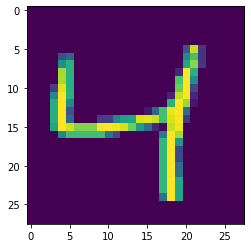

In [ ]:
def infer_data_labels(X_labels, cluster_labels):
  # empty array of len(X)
  predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

  for i, cluster in enumerate(X_labels):
      for key, value in cluster_labels.items():
          if cluster in value:
              predicted_labels[i] = key
            
  return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(AgglomerativeClustering, Y)
X_clusters = AgglomerativeClustering.fit_predict(X[:5000,])
#X_clusters says that each ndarray belong to which cluster but the index is not as same as label of our mnist(digits)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:10])
print (Y[:10])
plt.imshow(X[2].reshape(28,28))
plt.show()

Now lets measure our accuracy by two methods :purity and rand index .

In [ ]:
# purity measure function
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
# rand index measurement function
from sklearn.metrics.cluster import adjusted_rand_score
def rand_index_score(y_true,y_pred):
  return adjusted_rand_score(y_true,y_pred)

(5000,)

In [ ]:
print(" rand index score of agglomerative algorithm with n cluster parameter of 10 is :" +str(rand_index_score(Y[:5000,],predicted_labels)) )
print("purity  of agglomerativealgorithm with n cluster parameter of 10 is :" +str(purity_score(Y[:5000,],predicted_labels)) )

 rand index score of agglomerative algorithm with n cluster parameter of 10 is :0.4867033244603001
purity  of agglomerativealgorithm with n cluster parameter of 10 is :0.6532


*Statics are satisfying. However, we only caclute 5k of datas but we reach the rand index of 65% which is highest accuracy among other methods.*
